<a href="https://colab.research.google.com/github/leandrob13/dev-survey-analysis/blob/master/notebooks/python_dev_survey_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Developer Survey 2019: Data Science and Machine Learning by Age Ranges.


We are going to be looking at [Jet Brain's Python Developer Survey of 2019](https://www.jetbrains.com/lp/python-developers-survey-2019/#Methodology) and visualize the age distribution of developers that focus their work on data science and machine learning. This survey is a good case study for working with missing data and non conventional csv files. The columns in the dataset are defined by the questions made in the survey which by design forces you to deal with missing data.

After visualizing our data we should be able to answer the question: Is the data science and machine learning fields dominated by people older that 30 years?

The topics that we will be covering are:
- Downloading the dataset from a publicly shared file in google drive.
- Loading the csv file into a [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) `DataFrame`.
- Selecting a subset of columns from the `Dataframe` and cleaning rows that completely have missing data.
- Use boolean masks for filtering rows based on specific values.
- Manipulate and plot data as `Series` using pandas.
- Manipulate and plot data as `DataFrames` using pandas.
- Learn how to use bar plots with pandas. 

## Downloading the Dataset:

We are going to use the `requests` package for downloading the dataset hosted in google drive. Once we have stored the file, we load it into a pandas `DataFrame` object and visualize it.

In [ ]:
import os
import requests
import pandas as pd

LOCATION = "../data/python_dev_survey.csv"

def download_file_from_google_drive():
    """Given the file id, we download the csv."""

    file_id = "1roodP07AhK1-oM3d9jcr8ffnhQO8spdn"
    URL = "https://docs.google.com/uc?export=download"
    print("Downloading file")
    return requests.get(URL, params = { 'id' : file_id }, stream = True)

def save_response_content(response):
    CHUNK_SIZE = 32768
    data_path = "../data"
    if not os.path.exists(data_path):
        os.mkdir(data_path)
    print("Writing file")
    with open(LOCATION, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

res = download_file_from_google_drive()
save_response_content(res)
print("Done")
# Load the file into a dataframe.
df = pd.read_csv(LOCATION).set_index("response_id")
# Visualize the dataframe.
df

Writing file
Done


,Is Python the main language you use for your current projects?,Bash / Shell:What other language(s) do you use?,C/C++:What other language(s) do you use?,C#:What other language(s) do you use?,Clojure:What other language(s) do you use?,CoffeeScript:What other language(s) do you use?,Go:What other language(s) do you use?,Groovy:What other language(s) do you use?,HTML/CSS:What other language(s) do you use?,Java:What other language(s) do you use?,...,Product manager:Which of the following best describes your job role(s)?,QA engineer:Which of the following best describes your job role(s)?,Systems analyst:Which of the following best describes your job role(s)?,Team lead:Which of the following best describes your job role(s)?,Technical support:Which of the following best describes your job role(s)?,Technical writer:Which of the following best describes your job role(s)?,Which of the following industries best describes your company's business?,Which of the following industries do you develop for?,Could you tell us your age range?,What country do you live in?
response_id,,,,,,,,,,,,,,,,,,,,,
10,Yes,Bash / Shell,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology / Software Development,Information Technology / Software Development,30–39,Canada
100,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Banking / Real Estate / Mortgage Financing,NaN,30–39,United States
1000,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology / Software Development,Information Technology / Software Development,21–29,United States
10000,Yes,Bash / Shell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,"No, I use Python as a secondary language",Bash / Shell,C/C++,NaN,NaN,NaN,Go,NaN,HTML/CSS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology / Software Development,Customer Support,21–29,United Kingdom
9995,Yes,NaN,C/C++,NaN,NaN,NaN,NaN,NaN,HTML/CSS,Java,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Selecting the Desired Columns:

Now that we are able to partially visualize the data with the dataframe view, we now start to understand why this dataset is an interesting case. We see many `NaN` values in our rows which basically translates as missing data. We also realize that we are dealing with mostly categorical data, we have to make sense of it before deciding how to clean or map the missing data values.

Now comes the part of understanding which columns we keep in order to get the data we need for visualizing age distribution. Below, we define a list named `cols` which has the name of the columns we want to filter from the original dataframe. We then make a new copy of the dataframe and drop all the rows that have all the columns with `NaN` values.

We started with 47308 rows and 289 columns:

In [ ]:
# Column names we want to keep
cols = [
    'Is Python the main language you use for your current projects?', 
    'How long have you been programming in Python?', 
    'How many years of professional coding experience do you have?', 
    'For what purposes do you mainly use Python?', 
    'Data analysis: What do you use Python for?', 
    'Machine learning: What do you use Python for?', 
    'Data analysis:To what extent are you involved in the following activities?', 
    'Machine learning:To what extent are you involved in the following activities?', 
    'What is your employment status?', 
    'Could you tell us your age range?', 
    'What country do you live in?'
]

# Filter original dataframe, clean NaN rows
new_df = df[cols].copy().dropna(how="all")
new_df

,Is Python the main language you use for your current projects?,How long have you been programming in Python?,How many years of professional coding experience do you have?,For what purposes do you mainly use Python?,Data analysis: What do you use Python for?,Machine learning: What do you use Python for?,Data analysis:To what extent are you involved in the following activities?,Machine learning:To what extent are you involved in the following activities?,What is your employment status?,Could you tell us your age range?,What country do you live in?
response_id,,,,,,,,,,,
10,Yes,6–10 years,11+ years,Both for work and personal,NaN,NaN,NaN,NaN,Fully employed by a company / organization,30–39,Canada
100,Yes,3–5 years,1–2 years,For work,NaN,NaN,NaN,NaN,Fully employed by a company / organization,30–39,United States
1000,Yes,3–5 years,3–5 years,Both for work and personal,Data analysis,Machine learning,secondary activity,primary activity,Fully employed by a company / organization,21–29,United States
10000,Yes,1–2 years,Less than 1 year,"For personal, educational or side projects",Data analysis,NaN,NaN,NaN,NaN,NaN,NaN
10003,"No, I use Python as a secondary language",3–5 years,1–2 years,"For personal, educational or side projects",Data analysis,NaN,secondary activity,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9993,Yes,1–2 years,1–2 years,Both for work and personal,NaN,NaN,NaN,NaN,Fully employed by a company / organization,40–49,United States
9994,"No, I use Python as a secondary language",6–10 years,6–10 years,Both for work and personal,NaN,NaN,NaN,NaN,Self-employed <em>(a person earning income dir...,21–29,United Kingdom
9995,Yes,Less than 1 year,3–5 years,"For personal, educational or side projects",Data analysis,Machine learning,primary activity,primary activity,NaN,NaN,NaN


## Filter Rows with Boolean Masking

Now that we filtered columns and `NaN` rows, we are down to 35235 rows and 11 columns in our dataframe.

As we can see from visualizing our filtered dataframe, we are interested in columns that have non `NaN` values for `Data analysys` and `Machine learning` categories. We define the boolean mask `chosen_mask` for filtering the not `NaN` values from the `What do you use Python for?` category columns.

We are interested only in developers that reported using data science and machine learning as either primary or secondary activities and if they use python for work. To filter the data based on this criteria, we define te boolean masks `activity_mask` and `purpose_mask`.

Finally, we reference a view of our filtered dataset combining all the boolean masks:
`new_df[chosen_mask & activity_mask & purpose_mask]`

In [ ]:
import functools as ft

picked = ["Data analysis", "Machine learning"]
# Filter only those who reported using python for data analysis and machine learning
chosen_mask = ft.reduce(
    lambda a, b: a | (new_df[f"{b}: What do you use Python for?"].notna()), 
    picked, 
    False
)
# Filter those who reported using data science and machine learning as primary or secondary activity
activity_mask = ft.reduce(
    lambda a, b: a | (
        new_df[f"{b}:To what extent are you involved in the following activities?"]
            .str.contains("primary|secondary", na=False, regex=True)
    ), 
    picked, 
    False
)
# Filter those that reported using python for work
purpose_mask = (
    new_df["For what purposes do you mainly use Python?"]
        .str.contains("work", na=False, regex=True)
)

cleaned = new_df[chosen_mask & activity_mask & purpose_mask]
cleaned

,Is Python the main language you use for your current projects?,How long have you been programming in Python?,How many years of professional coding experience do you have?,For what purposes do you mainly use Python?,Data analysis: What do you use Python for?,Machine learning: What do you use Python for?,Data analysis:To what extent are you involved in the following activities?,Machine learning:To what extent are you involved in the following activities?,What is your employment status?,Could you tell us your age range?,What country do you live in?
response_id,,,,,,,,,,,
1000,Yes,3–5 years,3–5 years,Both for work and personal,Data analysis,Machine learning,secondary activity,primary activity,Fully employed by a company / organization,21–29,United States
1001,Yes,3–5 years,11+ years,For work,Data analysis,NaN,primary activity,NaN,NaN,NaN,NaN
10010,Yes,3–5 years,6–10 years,Both for work and personal,Data analysis,NaN,secondary activity,NaN,Fully employed by a company / organization,40–49,United States
10017,Yes,11+ years,11+ years,Both for work and personal,Data analysis,Machine learning,primary activity,primary activity,Fully employed by a company / organization,50–59,United States
10019,Yes,1–2 years,11+ years,Both for work and personal,Data analysis,Machine learning,primary activity,secondary activity,Fully employed by a company / organization,50–59,Belgium
...,...,...,...,...,...,...,...,...,...,...,...
9985,Yes,3–5 years,6–10 years,Both for work and personal,Data analysis,Machine learning,primary activity,primary activity,Fully employed by a company / organization,30–39,Czech Republic
9986,Yes,1–2 years,3–5 years,Both for work and personal,Data analysis,Machine learning,secondary activity,primary activity,Fully employed by a company / organization,21–29,Armenia
999,"No, I use Python as a secondary language",11+ years,11+ years,For work,NaN,Machine learning,NaN,primary activity,Fully employed by a company / organization,30–39,Finland


## Utility functions:

We define some utility functions that will help us with our visualization task.

In [ ]:
from matplotlib import pyplot as plt 

def age_grouper(idx):
    """Function that will help us group by a broader age group"""
    older = ["30–39", "40–49", "50–59", "60 or older"]
    return "Above Age 30" if idx in older else "Below Age 30"

def value_counter(series):
    """
    We count the ocurrences of a value in a series and normalize it so we can obtain the
    relative frequencies. We map those to get a percentage value.
    """
    return (
        series
          .value_counts(normalize=True)
          .map(lambda x: x * 100)
          .sort_index()
    )

def get_subplots():
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    ax1.set_yticks([])
    ax1.set_ylabel('Developer %')
    ax1.set_title('Developers by Age Ranges', fontsize=14)
    ax2.set_title('Developers Above or Below 30', fontsize=14)

    return ax1, ax2

def set_values_in_bars(axis_list):
    for ax in axis_list:
        for patch in ax.patches:
            height = patch.get_height()
            ax.annotate(
                "{:,.2f}".format(height),
                xy=(patch.get_x() + patch.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10
            )
            

## Visualizing Age distribution:

After filtering by our required criteria, we are down to 13519 rows and 11 columns in our dataframe. We proceed to visualize the age distribution of developers that engage in data science and machine learning activities.

The column `Could you tell us your age range?` contains the age information collected. This is defined as age ranges so we can consider it categorical data. We proceed to count the ocurrences of the values and return a series with normalized values as percentages.

In [ ]:
counts = value_counter(cleaned['Could you tell us your age range?'])
counts

18–20           3.581391
21–29          42.166832
30–39          34.455143
40–49          13.254747
50–59           4.904166
60 or older     1.637722
Name: Could you tell us your age range?, dtype: float64

We then proceed to define a subplot in matplotlib so we can visualize two plots in a single figure:
- The age distribution by age range categories.
- The age distribution by older or younger than 30 years of age.

We use pandas plotting capabilities, which sometimes is simpler for quick visualizations:

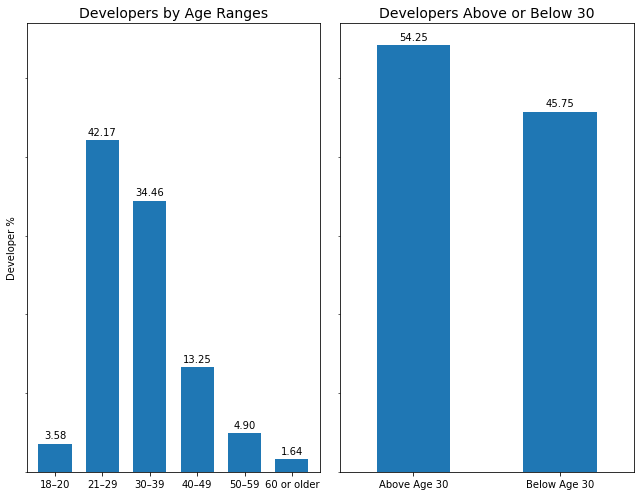

In [ ]:
%matplotlib inline

axis1, axis2 = get_subplots()
# General age range distribution
counts.plot(kind="bar", rot=0, ax=axis1, width = 0.7)
# Grouping the Series based on criteria defined in function age_grouper
counts.groupby(age_grouper).sum().plot.bar(rot=0, ax=axis2, figsize=(9, 7))
set_values_in_bars([axis1, axis2])
fig = axis1.get_figure()
fig.tight_layout()



We can see that the greatest frequency lands on the `21-29` age range with 42.17% of the developers in our data. Looking at the second plot we observe that even though the `21-29` category has the biggest percentage, the distribution for above age 30 is greater by about 10 points compared to below age 30.

So far the answer to our question is YES but only by 10 points.

## Visualizing Developers by Country:

What if we want to see the most significant population by country in our data? We can plot the percentage of the developers that belong to each country in our data. For visualization purposes, we are going to group all the countries together that have less than 0.5% of relative frequency.

We start by looking the 10 countries with the most developers:

In [ ]:
countries = cleaned['What country do you live in?']
country_counts = value_counter(countries)
country_counts.sort_values()[:-11:-1]

United States     23.969768
India             10.248335
Germany            6.865215
United Kingdom     5.686522
France             4.426849
Canada             3.626057
China              2.987223
Russia             2.501350
Brazil             2.465359
Netherlands        2.231420
Name: What country do you live in?, dtype: float64

Now we proceed to plot our result. We group the countries with less than 0.5% frequency into a new category called `Other`. We use pandas plotting functionality to define a horizontal bar plot that will show us our results.

Total number of countries:  91
Total devs:  11114


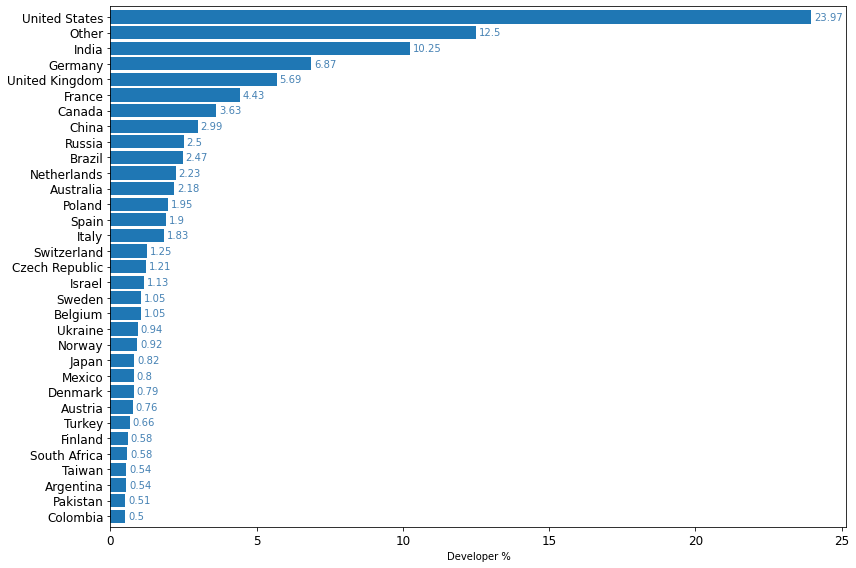

In [ ]:

grouped_countries = country_counts[country_counts < 0.5].index.values
grouped_counts = (
    country_counts
      .groupby(lambda idx: idx if idx not in grouped_countries else "Other")
      .sum()
      .sort_values()
)

axis = grouped_counts.plot.barh(figsize=(12, 8), width = 0.85, fontsize=12)
axis.set_xlabel('Developer %')
fig = axis.get_figure()

print("Total number of countries: ", len(countries.value_counts()))
print("Total devs: ", countries.value_counts().sum())

for i, v in enumerate(grouped_counts):
    plt.text(v + 0.1, i, str(round(v, 2)), color='steelblue', va="center")
fig.tight_layout()

We see the `United States` coming on top, so lets start comparing the data.

## Comparing The Most Significant Country:

Now that we observed that the `United States` has the most developers in our dataframe, we want to see how the age distribution in this country compares to the rest.

We start by filtering our `cleaned` dataset by specific country. We count the age ranges values as before

In [ ]:
us = cleaned[cleaned["What country do you live in?"] == "United States"]
us_counts = value_counter(us['Could you tell us your age range?'])
us_counts

18–20           1.915853
21–29          31.780616
30–39          38.016529
40–49          16.453794
50–59           8.189331
60 or older     3.643877
Name: Could you tell us your age range?, dtype: float64

In [ ]:
rest = cleaned[cleaned["What country do you live in?"] != "United States"]
rest_counts = value_counter(rest['Could you tell us your age range?'])
rest_counts

18–20           4.106023
21–29          45.438410
30–39          33.333333
40–49          12.247071
50–59           3.869365
60 or older     1.005798
Name: Could you tell us your age range?, dtype: float64

We create a dataframe that contains these two series and proceed to plot them directly with pandas. We create an additional dataframe that groups the results as `older and younger than 30` categories and plot them as we will do with the previous one.

Total United States:  2664
Total Rest of the World:  10855


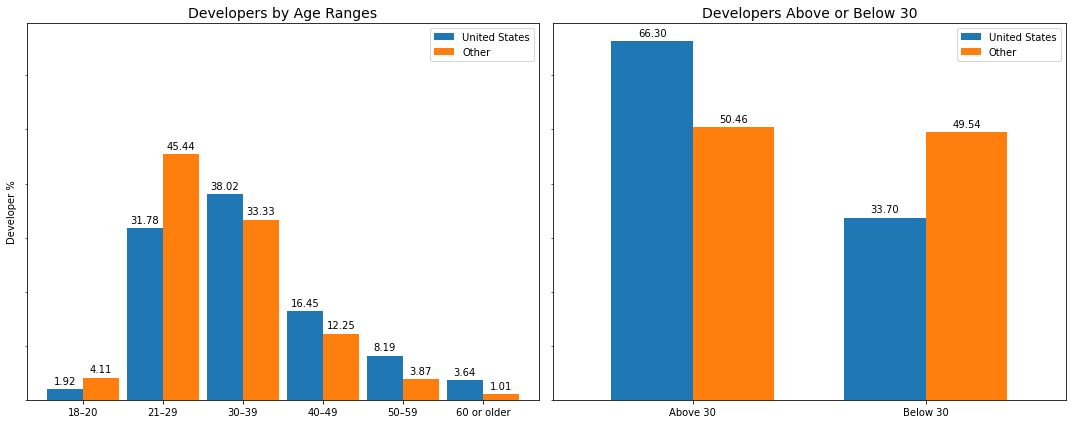

In [ ]:
# Get the subplots and axis
axis1, axis2 = get_subplots()
# Our age distribution dataframe which compares United States with the rest
ranges_df = pd.DataFrame(
    {"United States": us_counts.values, "Other": rest_counts.values}, index=us_counts.index
)
# Plot the data
ranges_df.plot.bar(rot=0, ax=axis1, width=0.9)
# Group the data into our broader age category
sum_df = pd.DataFrame(
    {
        "United States": us_counts.groupby(age_grouper).sum().values, 
        "Other": rest_counts.groupby(age_grouper).sum().values
    }, 
    index=["Above 30", "Below 30"]
)
# Plot it
sum_df.plot.bar(rot=0, ax=axis2, width = 0.7, figsize=(15, 6))

set_values_in_bars([axis1, axis2])
fig = axis1.get_figure()
fig.tight_layout()

print("Total United States: ", len(us))
print("Total Rest of the World: ", len(rest))


We now see that the age difference is more significant between those younger and older than 30 years of age in the `United States`. Professionals older than 30 represent 66.3% of the population in this country. Compared to the rest of the countries, this is an important trend since we observe that there is no significant difference in this group.

## Comparing The two Most Significant Countries:

Now if we take into account the second most significant country in our dataframe, we will be able to visualize how it affects the rest of the countries' data that we compared above.

In our data, `India` is the second most significant country. We now proceed to filter our data:

In [ ]:
india = rest[rest["What country do you live in?"] == "India"]
india_counts = value_counter(india['Could you tell us your age range?'])
india_counts

18–20           7.989464
21–29          72.168569
30–39          16.242318
40–49           2.458297
50–59           0.702371
60 or older     0.438982
Name: Could you tell us your age range?, dtype: float64

Lets replot everything and compare it with the `United States` and the rest of the countries combined.

Total United States:  2664
Total India:  1139
Total Rest of the World:  9716


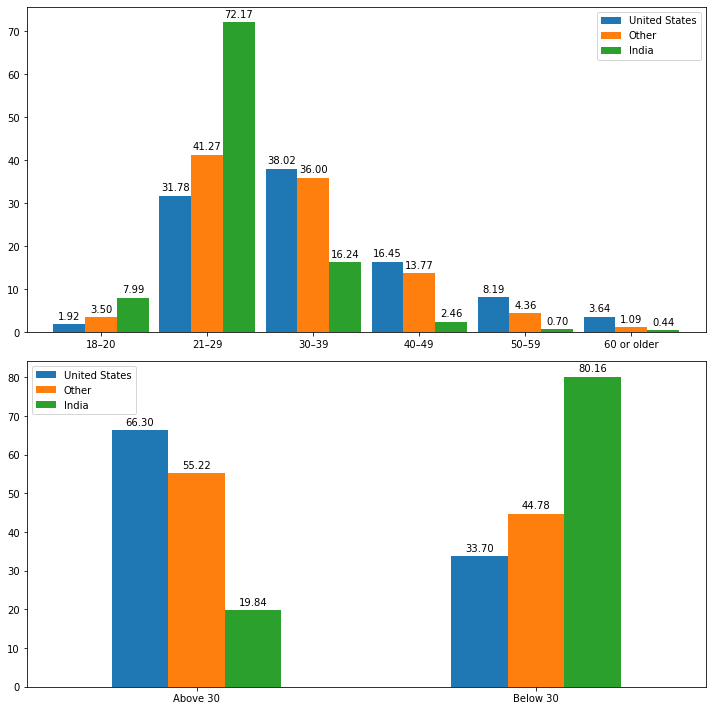

In [ ]:

# Filter out india from our previously filtered dataframe view
other = rest[rest["What country do you live in?"] != "India"]
other_counts = value_counter(other['Could you tell us your age range?'])

# Another way to define subplots. This time one below the other
fig, (axis1, axis2) = plt.subplots(2, 1, constrained_layout=True)
# We update our previous dataframe
ranges_df["India"] = india_counts.values
ranges_df["Other"] = other_counts.values
ranges_df.plot.bar(rot=0, ax=axis1, width=0.9)
# Same for our sum df
sum_df["India"] = india_counts.groupby(age_grouper).sum().values
sum_df["Other"] = other_counts.groupby(age_grouper).sum().values
sum_df.plot.bar(rot=0, ax=axis2, width = 0.5, figsize=(10, 10))

set_values_in_bars([axis1, axis2])
fig.tight_layout()

print("Total United States: ", len(us))
print("Total India: ", len(india))
print("Total Rest of the World: ", len(other))

## The quick conclusions:
- The younger than 30 professionals dominate the data science and machine learning fields in India with 80% of the population.
- The older than 30 professionals dominate the data science and machine learning fields in United States with 66% of the population.
- Without counting india when comparing it with the United States, the older/younger difference increases to fairly 10 points for the rest of the countries combined.
- Globally, the professionals older that 30 dominate the data science and machine learning fields for 2019.

We can keep grouping and analyzing the data looking to answer other interesting questions but for now I do believe we covered all the topics. Hopefully, I hope to have showed you a trick or two about data manipulation and visualization with pandas.